# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Использовать бутстрап для оценки влияния теста на средний чек
5. Сделать вывод по результатам проведенного теста 

## Задание 1. Выбрать окно конверсии

**1. Прочитай файл investigate_window.csv.**

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv ('investigate_window.csv', parse_dates = [1,2], index_col = 0)

In [3]:
historical_data.head()

user_id              main_page_viewed_at                order_completed_at  \
0  959238 2020-11-20 23:55:02.759000+00:00  2020-11-30 02:22:32.759000+00:00   
1  337366 2020-12-05 23:41:42.244000+00:00  2020-12-12 22:25:52.244000+00:00   
2  259956 2020-11-20 23:33:53.269000+00:00  2020-11-25 13:08:03.269000+00:00   
3  534280 2020-11-28 23:44:56.556000+00:00  2020-12-05 10:14:06.556000+00:00   
4  795121 2020-11-18 23:59:56.236000+00:00  2020-11-27 02:38:16.236000+00:00   

   time_to_order  
0       9.102431  
1       6.947338  
2       4.565394  
3       6.436921  
4       8.109954

In [4]:
historical_data.dtypes

user_id                             object
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at                  object
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**

In [5]:
import numpy as np

In [6]:
perc_95 = np.percentile (historical_data['time_to_order'], 95)
perc_90 = np.percentile (historical_data['time_to_order'], 90)
perc_85 = np.percentile (historical_data['time_to_order'], 85)

print ('perc_95 =', perc_95)
print ('perc_90 =', perc_90)
print ('perc_85 =', perc_85)

perc_95 = 7.117476851851854
perc_90 = 2.864949845679016
perc_85 = 1.9903886959876524


In [7]:
perc_95 = round (perc_95, 1)
perc_95

7.1

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Станислав\AppData\Local\Temp\ipykernel_14900\2423913113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (historical_data['time_to_order'])


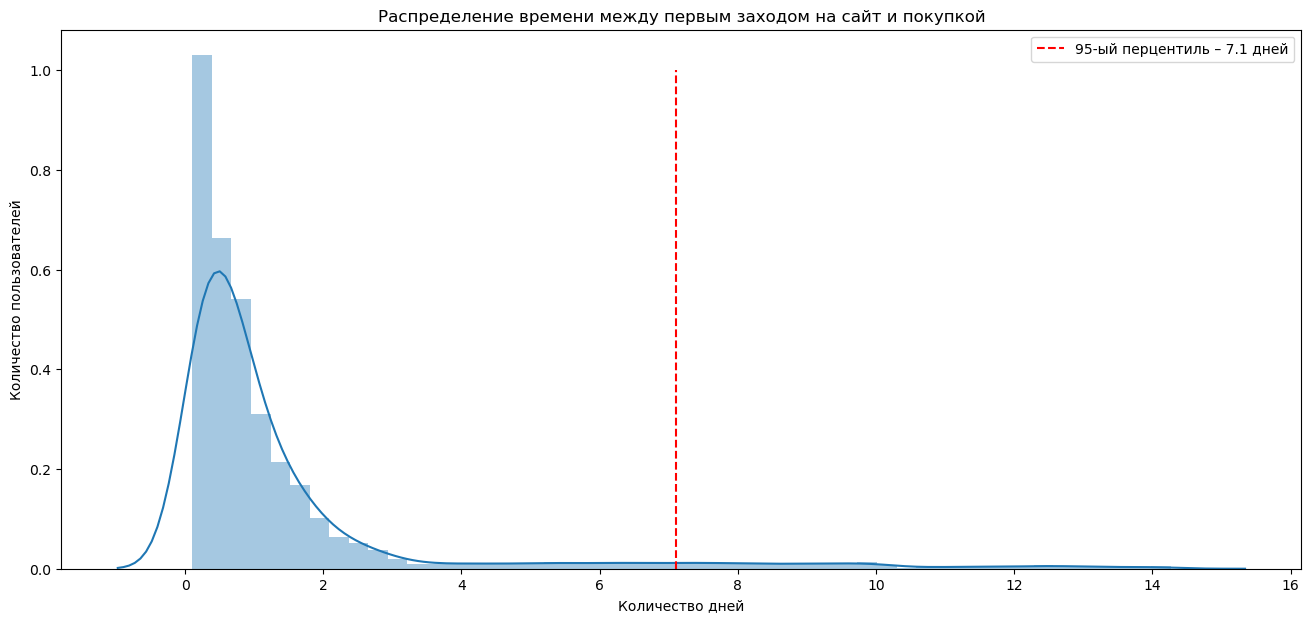

In [9]:
plt.figure (figsize = (16,7))
sns.distplot (historical_data['time_to_order'])
plt.vlines (perc_95, ymin = 0, ymax = 1, linestyles = 'dashed', color = 'red', label = f'95-ый перцентиль – {perc_95} дней')
plt.title ('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel ('Количество дней')
plt.ylabel ('Количество пользователей')
plt.legend ()
plt.show ()

## Задание 2.Исследовать распределение пользователей по группам по основным сегментам

**1. Прочитай файл bakery_ab_test.csv.**

In [10]:
data = pd.read_csv ('bakery_ab_test.csv', index_col = 0)
data

user_id test_group  purchase_amount geo_group acquisition_channel  \
1          3738       test       306.639511   regions       target_direct   
2          3755    control              NaN   regions       target_direct   
3          3772       test              NaN   regions       context_brand   
4          3789    control              NaN       spb       target_direct   
5          3806       test              NaN   regions        social_media   
...         ...        ...              ...       ...                 ...   
152995  2604636       test              NaN   regions       target_direct   
152996  2604653    control      5236.818309   regions             organic   
152997  2604670    control              NaN   regions       target_direct   
152998  2604687    control       101.783032   regions       target_direct   
152999  2604704       test              NaN       msk        social_media   

        within_window platform  
1                   1       pc  
2                   0       pc  
3                   0   mobile  
4                   0       pc  
5                   0       pc  
...               ...      ...  
152995              0       pc  
152996              1   mobile  
152997              0       pc  
152998              1       pc  
152999              0       pc  

[150483 rows x 7 columns]

**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**

In [11]:
def plot_segment_distribution (df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby (by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot (x = segment, 
                     y = 'user_id', 
                     hue = test_factor,
                     data = aggregated_data, 
                     kind = "bar", 
                     height = 4,
                     aspect = 1.5)

**3. Вызови функцию и посмотри на графики.**

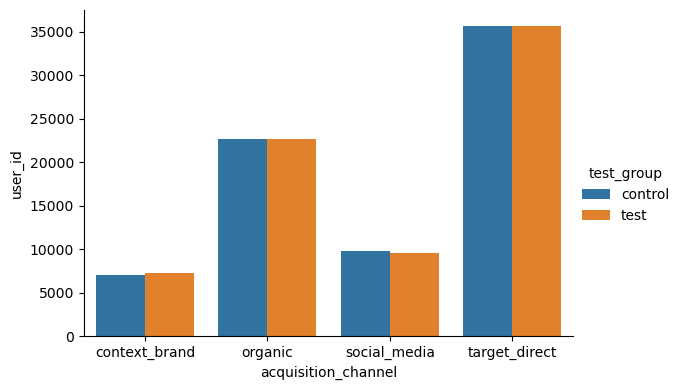

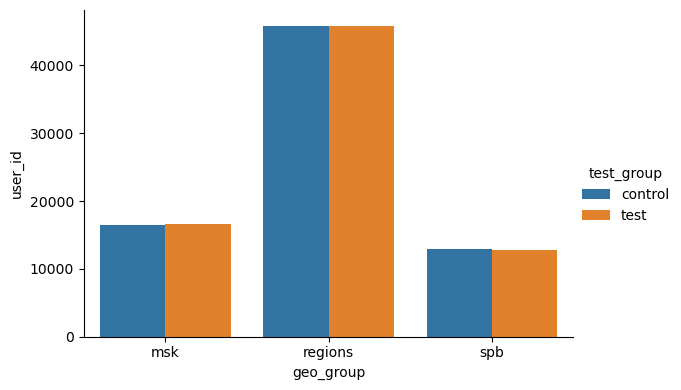

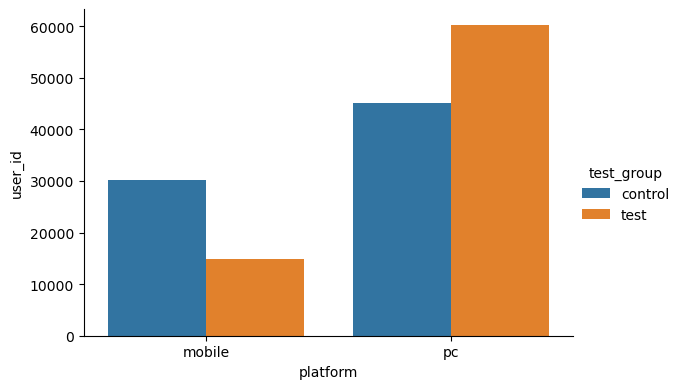

In [12]:
plot_segment_distribution (data, ["acquisition_channel",
                                  "geo_group",
                                  "platform"],
                            "test_group")

## Задание 3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат


**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)

In [13]:
metrics = data
metrics.head()

user_id test_group  purchase_amount geo_group acquisition_channel  \
1     3738       test       306.639511   regions       target_direct   
2     3755    control              NaN   regions       target_direct   
3     3772       test              NaN   regions       context_brand   
4     3789    control              NaN       spb       target_direct   
5     3806       test              NaN   regions        social_media   

   within_window platform  
1              1       pc  
2              0       pc  
3              0   mobile  
4              0       pc  
5              0       pc

In [14]:
metrics = data.groupby('test_group', as_index = False).agg({'user_id': 'count',
                                                            'within_window': 'sum',
                                                            'purchase_amount': 'mean'})

metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)

metrics.columns = ['test_group', 'count_users', 'count_purchases', 'mean_amount', 'conversion']
metrics

test_group  count_users  count_purchases  mean_amount  conversion
0    control        75210            22998  5170.864335       30.58
1       test        75273            24427  5394.771589       32.45

In [15]:
metrics_pc = data.loc[data['platform'] == 'pc']

metrics_pc = metrics_pc.groupby('test_group', as_index = False).agg({'user_id': 'count',
                                                                     'within_window': 'sum',
                                                                     'purchase_amount': 'mean'})

metrics_pc['conversion'] = round(metrics_pc['within_window'] / metrics_pc['user_id']*100, 2)

metrics_pc.columns = ['test_group', 'count_users', 'count_purchases', 'mean_amount', 'conversion']
metrics_pc

test_group  count_users  count_purchases  mean_amount  conversion
0    control        45112            13732  5200.121803       30.44
1       test        60317            19659  5401.003720       32.59

In [16]:
metrics_mobile = data.loc[data['platform'] == 'mobile']

metrics_mobile = metrics_mobile.groupby('test_group', as_index = False).agg({'user_id': 'count',
                                                                             'within_window': 'sum',
                                                                             'purchase_amount': 'mean'})

metrics_mobile['conversion'] = round(metrics_mobile['within_window'] / metrics_mobile['user_id']*100, 2)

metrics_mobile.columns = ['test_group', 'count_users', 'count_purchases', 'mean_amount', 'conversion']
metrics_mobile

test_group  count_users  count_purchases  mean_amount  conversion
0    control        30098             9266  5127.505438       30.79
1       test        14956             4768  5369.075812       31.88

**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

In [17]:
import statsmodels.stats.proportion as proportion

In [18]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['count_purchases'], metrics['count_users'])
pval

5.321539863368111e-15

In [19]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['count_purchases'], metrics_pc['count_users'])
pval_pc

1.0436637877855105e-13

In [20]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['count_purchases'], metrics_mobile['count_users'])
pval_mobile

0.018202784051985058

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [21]:
alpha = 0.05

print (pval < alpha)
print (pval_pc < alpha)
print (pval_mobile < alpha)

True
True
True


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

Наши p-value меньше альфа, значит, что наша нулевая гипотеза неверна, и есть разница в наших наблюдениях по группам

## Задание 4. Оценить влияние теста на средний чек с помощью бутстрапа

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат.**

In [22]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [23]:
test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data[(data['test_group'] == 'test') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = data[(data['test_group'] == 'control') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = data[(data['test_group'] == 'test') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = data[(data['test_group'] == 'control') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**

In [24]:
boot = bs.bootstrap_ab (test = test,
                        ctrl = control, 
                        stat_func = bs_stats.mean,
                        compare_func = bs_compare.difference,
                        return_distribution = True)

boot

array([199.99186555, 177.23911624, 227.10934416, ..., 220.63854022,
       229.89343069, 162.25680994])

In [25]:
boot_pc = bs.bootstrap_ab (test = test_pc,
                           ctrl = control_pc, 
                           stat_func = bs_stats.mean,
                           compare_func = bs_compare.difference,
                           return_distribution = True)

boot_pc

array([189.96259476, 208.56876613, 215.51185864, ..., 239.01808027,
       138.50646174, 215.56375524])

In [26]:
boot_mobile = bs.bootstrap_ab (test = test_mobile,
                               ctrl = control_mobile, 
                               stat_func = bs_stats.mean,
                               compare_func = bs_compare.difference,
                               return_distribution = True)

boot_mobile

array([197.58919944, 225.32071648, 263.53506893, ..., 192.97545458,
       233.91460737, 192.89617933])

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [27]:
borders = np.percentile(boot, [2.5, 97.5])
borders_pc = np.percentile(boot_pc, [2.5, 97.5])
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])

print(borders)
print(borders_pc)
print(borders_mobile)

[141.78512917 303.84899739]
[101.67536531 298.26542752]
[ 87.93786498 399.81503386]


**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

C:\Users\Станислав\AppData\Local\Temp\ipykernel_14900\4011111462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (boot)


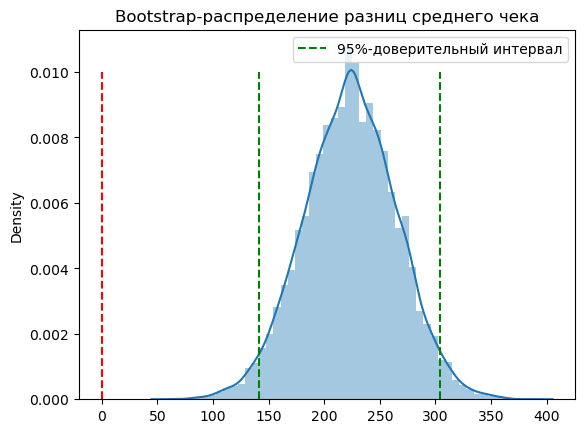

In [28]:
sns.distplot (boot)
plt.title ('Bootstrap-распределение разниц среднего чека')
plt.rcParams ["figure.figsize"] = (10, 5)
plt.vlines (0, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles= '--', 
            colors = 'red')
plt.vlines (borders, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles = '--', 
            colors = 'green', 
            label = '95%-доверительный интервал')
plt.legend ()
plt.show ()

C:\Users\Станислав\AppData\Local\Temp\ipykernel_14900\4097992004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (boot_pc)


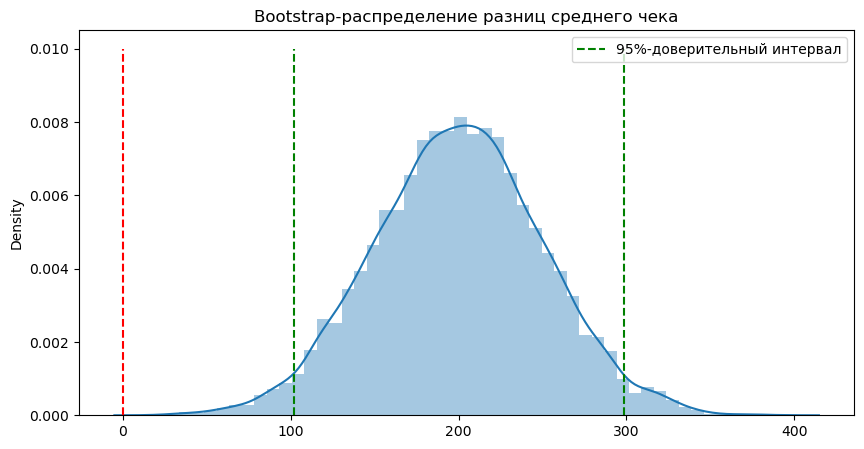

In [29]:
sns.distplot (boot_pc)
plt.title ('Bootstrap-распределение разниц среднего чека')
plt.rcParams ["figure.figsize"] = (12, 6)
plt.vlines (0, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles = '--', 
            colors = 'red')
plt.vlines (borders_pc, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles = '--', 
            colors = 'green', 
            label = '95%-доверительный интервал')
plt.legend ()
plt.show ()

C:\Users\Станислав\AppData\Local\Temp\ipykernel_14900\2079755997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (boot_mobile)


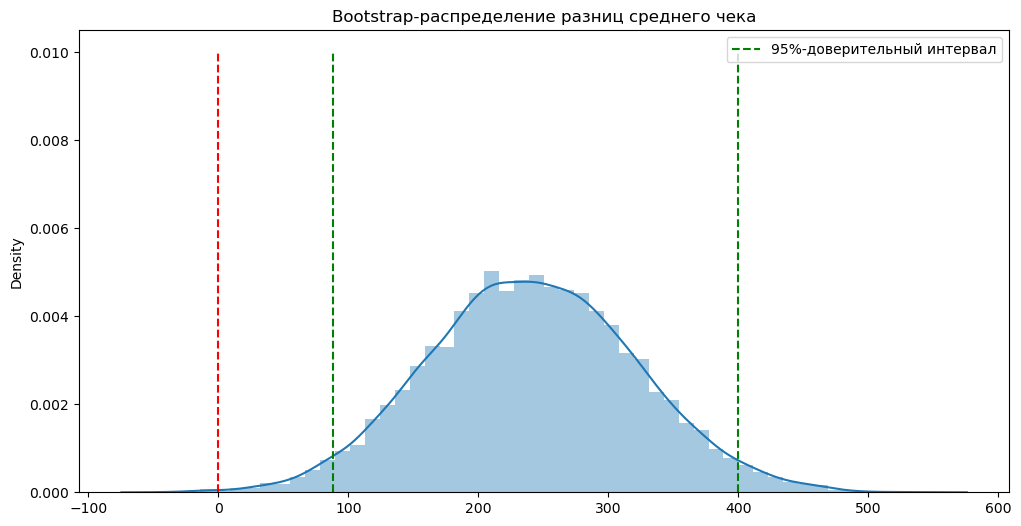

In [30]:
sns.distplot (boot_mobile)
plt.title ('Bootstrap-распределение разниц среднего чека')
plt.rcParams ["figure.figsize"] = (12, 6)
plt.vlines (0, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles = '--', 
            colors = 'red')
plt.vlines (borders_mobile, 
            ymin = 0, 
            ymax = 0.01, 
            linestyles = '--', 
            colors = 'green', 
            label = '95%-доверительный интервал')
plt.legend ()
plt.show ()

## Задание 5. Сделать вывод по результатам проведённого теста

Нужно ли внедрять изменение каталога?

*По пройденным этам исследования можно сказать, что есть разница в средних чеках между тестовой и контрольной группами.
Тестовая группа показала себя лучше, значит, можно внедрять изменения каталога. Но вот есть одно "НО", я бы рекомендовал продолжить тестирование, чтобы посмотреть уже на более больших выборках.*